In [51]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

fig_dpi = 200
lw = 3

# Dense Layers

Exponential LR Decay: 0.98

100 Epochs

## Index
0. fc layers
1. nodes per layer
2. top-1 accuracy
3. top-5 accuracy
4. last val loss
5. last val accuracy

In [52]:
fc_results = np.array([
    [1, 256, 52.44, 79.86, 2.49, 57.66],
    [1, 512, 49.29, 73.93, 2.95, 53.25],
    [1, 1024, 40.7, 68.38, 3.66, 45.22],
    [1, 2048, 32.12, 58.93, 4.66, 35.72],
    [1, 4096, 24.03, 46.76, 5.61, 27.94],
    [1, 8192, 19.70, 41.01, 6.42, 23.96],
    
    [2, 256, 54.48, 81.22, 1.86, 57.11],
    [2, 512, 56.64, 82.46, 1.94, 60.23],
    [2, 1024, 56.39, 81.53, 2.08, 60.91],
    [2, 2048, 51.39, 79.00, 2.38, 56.74],
    [2, 4096, 44.41, 71.83, 3.04, 47.61], # DEFAULT ALEXNET
    [2, 8192, 37.74, 64.36, 3.60, 42.40],
    
    [3, 256, 0.80, 2.10, 5.29, 0.55],
    [3, 512, 30.7, 65.16, 2.57, 30.82],
    [3, 1024, 48.36, 76.65, 2.30, 49.88],
    [3, 2048, 54.11, 80.48, 2.38, 58.21],
    [3, 4096, 54.48, 82.09, 2.39, 57.17],
    [3, 8192, 50.71, 78.57, 2.55, 55.88],
    
    [4, 256, 0.80, 2.29, 5.29, 0.55],
    [4, 512, 0.80, 2.10, 5.29, 0.55],
    [4, 1024, 0.80, 2.10, 5.29, 0.55],
    [4, 2048, 25.45, 60.9, 2.84, 28.55],
    [4, 4096, 41.14, 73.81, 2.81, 46.32],
    [4, 8192, 49.85, 77.58, 2.97, 53.92]
])

fc_0_results = [0, 196, 28.91, 54.05, 6.52, 33.21]

layers = [1, 2, 3, 4]
nodes = [256, 512, 1024, 2048, 4096, 8192]

fc_matrix = np.zeros((len(layers), len(nodes)))
for i in fc_results:
    fc_matrix[layers.index(i[0]), nodes.index(i[1])] = i[2]

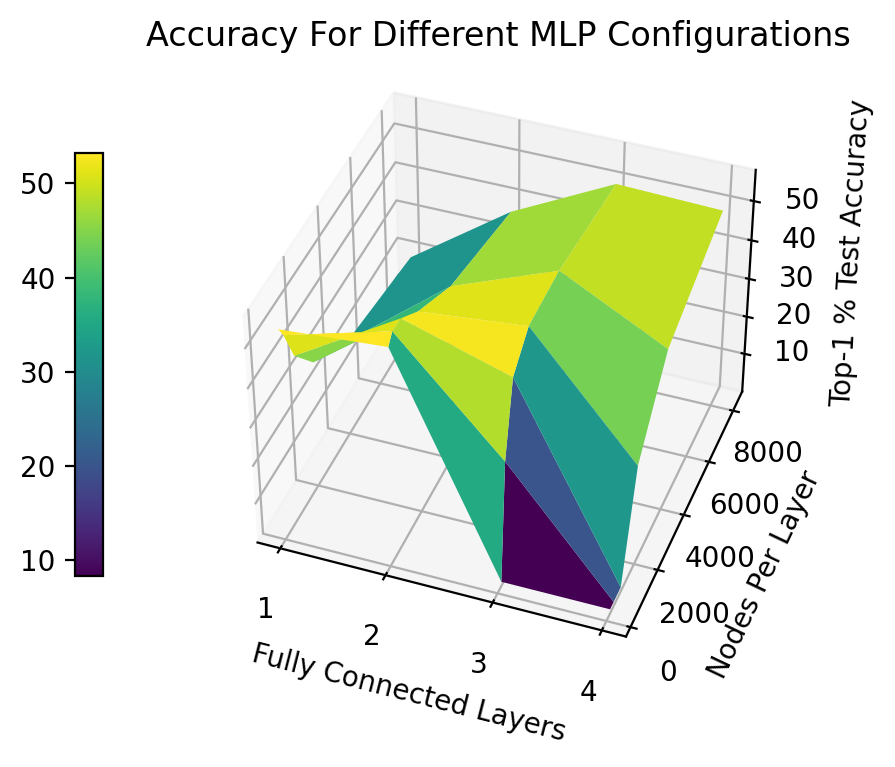

In [53]:
X, Y = np.meshgrid(layers, nodes)

fig = plt.figure(figsize=(6, 4))
# fig = plt.figure()
fig.set_dpi(fig_dpi)

ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, fc_matrix.T, cmap='viridis')

ax.set_title('Accuracy For Different MLP Configurations')
ax.set_xlabel('Fully Connected Layers')
ax.set_ylabel('Nodes Per Layer')
ax.set_zlabel('Top-1 % Test Accuracy')
ax.set_xticks([1, 2, 3, 4])

ax.view_init(40, -70)
fig.colorbar(surf, location="left", shrink=0.7, aspect=15)

# plt.tight_layout()
plt.savefig('fc-accuracy-surf.png')

plt.show()

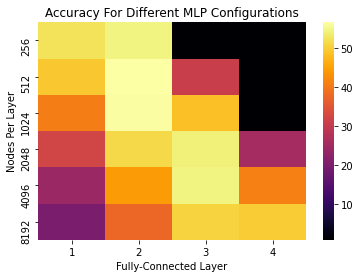

In [54]:
fig = plt.figure()
# fig.set_dpi(fig_dpi)

sns.heatmap(fc_matrix.T, xticklabels=layers, yticklabels=nodes, cmap='inferno')

plt.title("Accuracy For Different MLP Configurations")
plt.xlabel("Fully-Connected Layer")
plt.ylabel("Nodes Per Layer")

# plt.tight_layout()
# plt.savefig('fc-accuracy-surf.png')

plt.show()

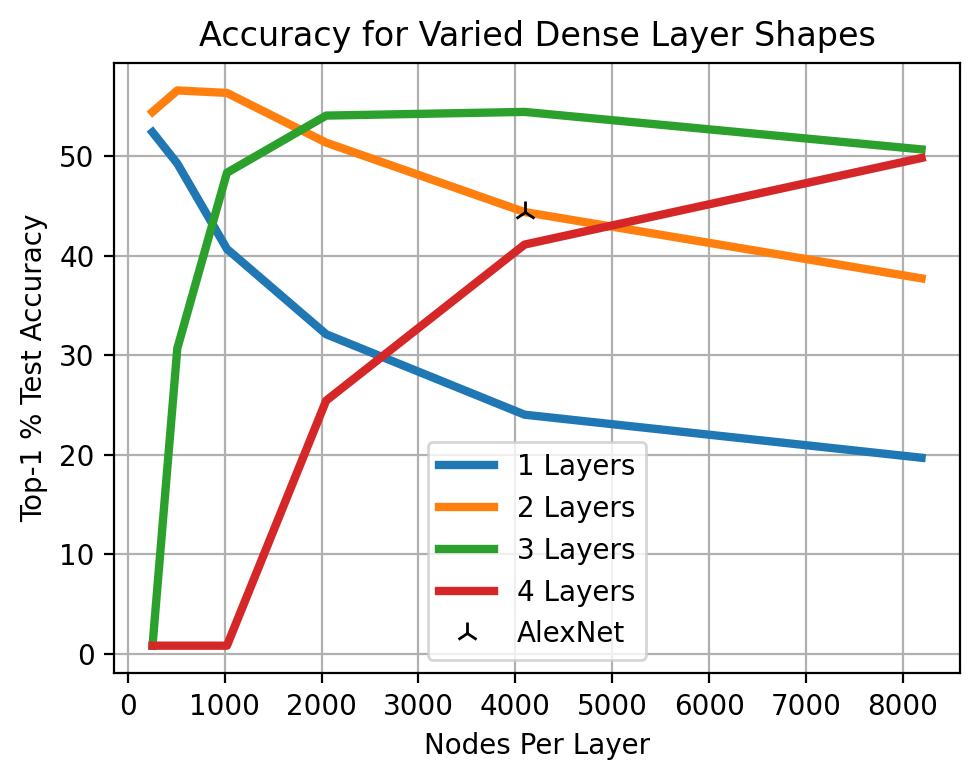

In [55]:
fig = plt.figure(figsize=(5, 4))
fig.set_dpi(fig_dpi)

# plt.plot([196], fc_0_results[2], 'x-', label=f'0 Layers')

for i in layers:
    plt.plot(nodes, fc_matrix[i-1, :], '-', label=f'{i} Layers', ms=8, lw=lw)

plt.plot([4096], [fc_matrix[1, 4]], "2", label="AlexNet", ms="8", c=(0, 0, 0))

# plt.annotate('Standard\nAlexNet', 
#              (4096, fc_matrix[layers.index(2), nodes.index(4096)]),
#              textcoords="offset points",
#              xytext=(40, 10),
#              ha='center',
#              arrowprops={'arrowstyle': 'simple'}
#             )
    
plt.title('Accuracy for Varied Dense Layer Shapes')
plt.xlabel('Nodes Per Layer')
plt.ylabel('Top-1 % Test Accuracy')

plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('fc-accuracy.png')

plt.show()

# Convolutional Non-Linearity

Exponential LR Decay: 0.98

100 Epochs

Taking conovlutional layers and distributing the standard number of filters into separate conv layers with ReLu nonlinearity

## Index
0. convolutional layer
1. number of divisions
2. top-1 accuracy
3. top-5 accuracy
4. last val loss
5. last val accuracy

In [56]:
conv_nonlin_results = np.array([
#     [1, 1, 44.41, 71.83, 3.04, 47.61], # STANDARD ALEXNET
#     [1, 2],
#     [1, 4],
    
    [4, 1, 44.41, 71.83, 3.04, 47.61], # STANDARD ALEXNET
    [4, 2, 42.31, 71.96, 3.07, 49.75],
    [4, 4, 0.8, 2.47, 5.29, 0.55],
    
    [5, 1, 44.41, 71.83, 3.04, 47.61], # STANDARD ALEXNET
    [5, 2, 46.08, 73.87, 3.00, 49.20],
    [5, 4, 0.8, 2.47, 5.29, 0.55]
])

nonlin_layers = [4, 5]
nonlin_div = [1, 2, 4]

conv_nonlin_matrix = np.zeros((len(nonlin_layers), len(nonlin_div)))
for i in conv_nonlin_results:
    conv_nonlin_matrix[nonlin_layers.index(i[0]), nonlin_div.index(i[1])] = i[2]

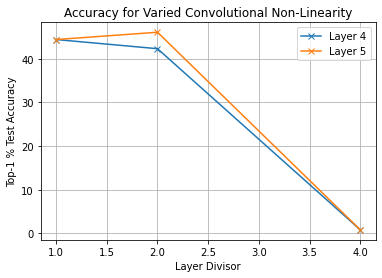

In [57]:
for idx, i in enumerate(nonlin_layers):
    plt.plot(nonlin_div, conv_nonlin_matrix[idx, :], 'x-', label=f'Layer {i}')

plt.title('Accuracy for Varied Convolutional Non-Linearity')
plt.xlabel('Layer Divisor')
plt.ylabel('Top-1 % Test Accuracy')

plt.grid()
plt.legend()
plt.show()

# Convolutional Kernel Size

Exponential LR Decay: 0.98

100 Epochs

## Index
0. convolutional layer
1. kernel size
2. top-1 accuracy
3. top-5 accuracy
4. last val loss
5. last val accuracy

In [58]:
kernel_results = np.array([
    [1, 3, 37.06, 64.73, 3.38, 44.36],
    [1, 5, 43.73, 70.35, 3.19, 48.22],
    [1, 7, 44.72, 71.16, 3.00, 48.96],
    [1, 11, 44.41, 71.83, 3.04, 47.61], # DEFAULT ALEXNET
    [1, 15, 43.17, 71.59, 3.09, 47.55],

    [2, 3, 41.63, 67.63, 3.24, 45.53],
    [2, 5, 44.41, 71.83, 3.04, 47.61], # DEFAULT ALEXNET
    [2, 7, 45.15, 72.21, 2.97, 50.49],
    [2, 9, 43.61, 71.34, 3.10, 47.37],
    [2, 11, 39.35, 65.6, 3.36, 44.98],

    [3, 3, 44.41, 71.83, 3.04, 47.61], # DEFAULT ALEXNET
    [3, 5, 50.59, 75.91, 2.74, 53.80],
    [3, 7, 47.13, 75.48, 3.19, 52.21],
    [3, 9, 40.83, 69.73, 3.90, 47.00],
    [3, 11, 33.29, 61.70, 5.27, 38.05],

    [4, 3, 44.41, 71.83, 3.04, 47.61], # DEFAULT ALEXNET
    [4, 5, 48.67, 74.74, 2.92, 51.84],
    [4, 7, 49.54, 76.34, 2.98, 52.63],
    [4, 9, 47.19, 74.24, 3.40, 50.37],
    [4, 11, 43.55, 70.29, 3.98, 47.24],

    [5, 3, 44.41, 71.83, 3.04, 47.61], # DEFAULT ALEXNET
    [5, 5, 46.94, 74.31, 2.88, 51.53],
    [5, 7, 48.24, 75.42, 2.87, 51.84],
    [5, 9, 47.56, 74.68, 2.94, 53.43],
    [5, 11, 44.1, 72.45, 3.60, 48.28],
])

default_kernel_sizes = [11, 5, 3, 3, 3]
kernel_layers = {i[0] for i in kernel_results}

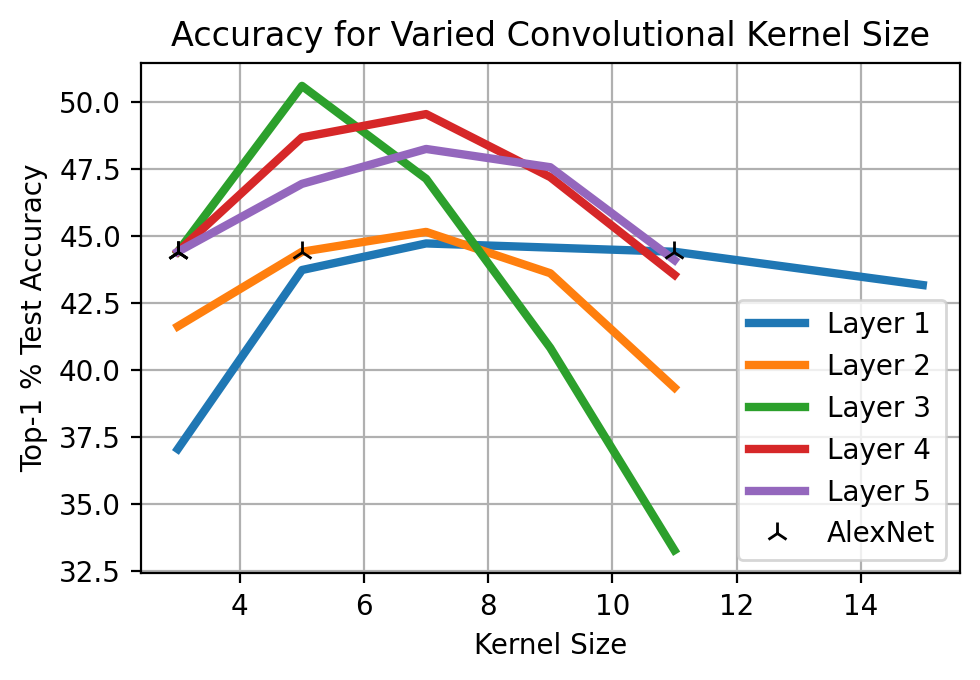

In [59]:
fig = plt.figure(figsize=(5, 3.5))
fig.set_dpi(fig_dpi)

kernel_parsed_results = [(list(), list()) for _ in kernel_layers]
for row in kernel_results:
    kernel_parsed_results[int(row[0]) - 1][0].append(row[2]) # top-1 accuracy
    kernel_parsed_results[int(row[0]) - 1][1].append(row[1]) # kernel size (x value)

for idx, l in enumerate(kernel_parsed_results):
    plt.plot(l[1], l[0], '-', label=f'Layer {idx+1}', lw=lw)

for idx, l in enumerate(kernel_parsed_results):
    # print(l)
    # print(l[0][l[1].index(default_kernel_sizes[idx])])

    if idx == len(kernel_parsed_results) - 1:
        label = 'AlexNet'
    else:
        label = None
    plt.plot([default_kernel_sizes[idx]], [l[0][l[1].index(default_kernel_sizes[idx])]], "2", label=label, ms="8", c=(0, 0, 0))

plt.title('Accuracy for Varied Convolutional Kernel Size')
plt.xlabel("Kernel Size")
plt.ylabel('Top-1 % Test Accuracy')

plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('kernel-accuracy.png')

plt.show()